In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
from sqlalchemy import create_engine


client = MongoClient('mongodb://localhost:27017/')
db=client['MongoDB_project']
collection = db['games']
documents = collection.find({},{'_id':0,'home_club_manager_name':0,'away_club_manager_name':0, 'stadium':0,'refree':0,'url':0,'aggregate':0,'competition_type':0,'home_club_formation':0,'away_club_formation':0})
games_df = pd.DataFrame(list(documents))

games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,referee,home_club_name,away_club_name
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,21700.0,Vladislav Bezborodov,RFK Akhmat Grozny,FK Spartak Moskva
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,11400.0,Sergey Ivanov,PFK Krylya Sovetov Samara,Amkar Perm
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,12000.0,Sergey Karasev,PFK CSKA Moskva,FK Dinamo Moskva
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,11408.0,Sergey Karasev,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,7534.0,Timur Arslanbekov,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,NaN,10000.0,Cristian Balaj,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,NaN,31000.0,Allard Lindhout,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,34200.0,Anthony Taylor,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,9410.0,Michael Salisbury,Stoke City,NaN


## Type Check

In [2]:
games_df.dtypes

game_id                        int64
competition_id                object
season                         int64
round                         object
date                  datetime64[ns]
home_club_id                   int64
away_club_id                   int64
home_club_goals                int64
away_club_goals                int64
home_club_position           float64
away_club_position           float64
attendance                   float64
referee                       object
home_club_name                object
away_club_name                object
dtype: object

# Analysis of Attendance at Soccer Matches

In this section, we will analyze the attendance at soccer matches across different seasons, using data extracted from our MongoDB database. The goal is to assess how attendance varies over time and to identify any significant trends or patterns, with a specific focus on monthly attendance variations.

We will use the `pandas` package to manipulate the data and `matplotlib` along with `ipywidgets` to display interactive charts. These charts will allow us to explore the average monthly attendance for each selected season through a dropdown menu. This analysis will help us better understand the factors that may influence spectator presence during different seasons and months.

## Methodology
The data were pre-processed using the `.loc` method to safely modify the DataFrame without risking unintended changes. We removed unnecessary columns and filtered out rows with missing values in the `attendance` attribute. We then converted the `date` column to datetime format and extracted the year and month to a new column, `year_month`, which facilitated the aggregation of attendance data on a monthly basis. We calculated descriptive statistics for monthly attendance, such as the mean, to observe trends over time within each season.


## Data Cleanup

In [3]:
games_df = games_df.copy()

# Rimuovere le righe con valori mancanti nella colonna 'attendance'
games_df = games_df.dropna(subset=['attendance'])

# Convertire 'attendance' in un formato numerico intero
games_df['attendance'] = games_df['attendance'].astype(int)


games_df




,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance,referee,home_club_name,away_club_name
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,21700,Vladislav Bezborodov,RFK Akhmat Grozny,FK Spartak Moskva
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,11400,Sergey Ivanov,PFK Krylya Sovetov Samara,Amkar Perm
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,12000,Sergey Karasev,PFK CSKA Moskva,FK Dinamo Moskva
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,11408,Sergey Karasev,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,7534,Timur Arslanbekov,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,NaN,10000,Cristian Balaj,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,NaN,31000,Allard Lindhout,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,34200,Anthony Taylor,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,9410,Michael Salisbury,Stoke City,NaN


## Data Analysis

In [4]:

# Modifica della funzione plot_attendance per includere controlli
def plot_attendance(season):
    data = games_df.loc[games_df['season'] == season].copy()
    print(f"Numero di partite per la stagione {season}: {len(data)}")  # Stampa il numero di partite per stagione

    # Converte 'date' in datetime, gestendo possibili valori non validi
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 'coerce' trasforma valori non validi in NaT
    data = data.dropna(subset=['date'])  # Rimuovi eventuali righe con NaT in 'date'
    
    data.loc[:, 'year_month'] = data['date'].dt.to_period('M')

    # Calcolo della media mensile di attendance
    monthly_data = data.groupby('year_month')['attendance'].mean().reset_index()
    monthly_data['year_month'] = monthly_data['year_month'].astype(str)  # Preparazione per il plotting

   

    # Plotting
    plt.figure(figsize=(8,6))
    sns.barplot(x='year_month', y='attendance', data=monthly_data)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Monthly Attendance in {season}')
    plt.ylabel('Average Attendance')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

seasons = sorted(games_df['season'].unique(), key=lambda x: (x is not None, x))  # Include un controllo per None
widgets.interact(plot_attendance, season=widgets.Dropdown(options=seasons, description="Season:"))


interactive(children=(Dropdown(description='Season:', options=(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,…

<function __main__.plot_attendance(season)>

# Inconsistencies in Match Data

During the analysis of the matches for the 2021 season, a significant issue regarding the dating of some games was uncovered. Specifically, it has been discovered that several matches attributed to the 2021 season were erroneously recorded as having taken place in 2023. This inconsistency could affect the accuracy of trend analysis and attendance figures.

## Implications
This error in the data could lead to incorrect conclusions regarding attendance trends, team performance, and other seasonal analytics. It is important to address these discrepancies before proceeding with further data analysis to ensure the reliability of our findings.


In [5]:

query = {
    'date': {
        '$gte': pd.Timestamp('2023-01-01T00:00:00.000Z'),
        '$lt': pd.Timestamp('2024-01-01T00:00:00.000Z')   
    },
    'season': 2021 
}


documents = collection.find(query)


copy_games_df = pd.DataFrame(list(documents))


copy_games_df

,_id,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type
0,6613c0fc54a57856bc021a06,3989307,CGB,2021,Quarter-Finals,2023-01-10,762,1003,2,0,Eddie Howe,Brendan Rodgers,St James' Park,52009,Darren England,https://www.transfermarkt.co.uk/spielbericht/i...,Newcastle United Football Club,Leicester City,2:0,other
1,6613c0fc54a57856bc02219f,3989304,CGB,2021,Quarter-Finals,2023-01-10,985,358,3,0,Erik ten Hag,Dean Holden,Old Trafford,74345,Jarred Gillett,https://www.transfermarkt.co.uk/spielbericht/i...,Manchester United Football Club,NaN,3:0,other
2,6613c0fc54a57856bc0230d9,3989305,CGB,2021,Quarter-Finals,2023-01-11,180,281,2,0,Nathan Jones,Pep Guardiola,St Mary's Stadium,22996,Peter Bankes,https://www.transfermarkt.co.uk/spielbericht/i...,Southampton FC,Manchester City Football Club,2:0,other
3,6613c10054a57856bc02acf5,3989306,CGB,2021,Quarter-Finals,2023-01-11,703,543,5,4,Steve Cooper,Julen Lopetegui,The City Ground,28656,Graham Scott,https://www.transfermarkt.co.uk/spielbericht/i...,Nottingham Forest Football Club,Wolverhampton Wanderers Football Club,5:4,other


## Analysis of Attendance Based on Home Club Position

### Overview
This analysis investigates the relationship between the attendance at soccer matches and the league position of the home club. The hypothesis is that teams in higher positions within the league attract more spectators due to better performance or greater popularity.

### Data Preparation
The dataset used includes match details such as attendance numbers and the home club's position in the league. Prior to the analysis, the data was cleaned to remove any rows with missing values in these critical fields. The position data was also converted to an integer format to facilitate numerical analysis.

### Methodology
The analysis involved grouping the match data by the home club's league position and calculating the average attendance for each position. This method helps in understanding whether a correlation exists between a club's success and its ability to draw larger crowds.

## Data Clean

In [6]:
games_df.dropna(subset=['attendance', 'home_club_position'], inplace=True)


games_df['home_club_position'] = games_df['home_club_position'].astype(int)






## Data Analysis


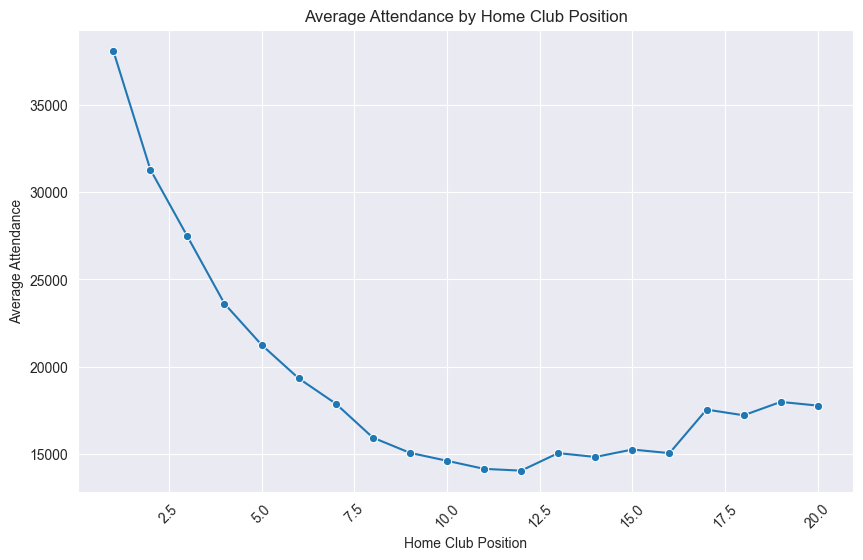

In [7]:
attendance_by_position = games_df.groupby('home_club_position')['attendance'].mean().reset_index()


attendance_by_position.sort_values('home_club_position', inplace=True)


plt.figure(figsize=(10, 6))
sns.lineplot(x='home_club_position', y='attendance', data=attendance_by_position, marker='o')
plt.title('Average Attendance by Home Club Position')
plt.xlabel('Home Club Position')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion

The analysis confirms the initial hypothesis that higher positions in the league correlate with increased
match attendance, aligning with expectations that successful teams attract more spectators. However, there are
 exceptions to this trend, suggesting that factors external to the game, such as weather conditions,
may also significantly influence attendance figures.


